# Multiple Linear Regression

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [51]:
data = pd.read_csv("ex1data2.csv")
data.head()

,"Size,Bedrooms,Price"
0,"2104,3,399900"
1,"1600,3,329900"
2,"2400,3,369000"
3,"1416,2,232000"
4,"3000,4,539900"


In [52]:
data.dtypes

Size,Bedrooms,Price    object
dtype: object

In [53]:
d = data.iloc[:,-1].values
d

array(['2104,3,399900', '1600,3,329900', '2400,3,369000', '1416,2,232000',
       '3000,4,539900', '1985,4,299900', '1534,3,314900', '1427,3,198999',
       '1380,3,212000', '1494,3,242500', '1940,4,239999', '2000,3,347000',
       '1890,3,329999', '4478,5,699900', '1268,3,259900', '2300,4,449900',
       '1320,2,299900', '1236,3,199900', '2609,4,499998', '3031,4,599000',
       '1767,3,252900', '1888,2,255000', '1604,3,242900', '1962,4,259900',
       '3890,3,573900', '1100,3,249900', '1458,3,464500', '2526,3,469000',
       '2200,3,475000', '2637,3,299900', '1839,2,349900', '1000,1,169900',
       '2040,4,314900', '3137,3,579900', '1811,4,285900', '1437,3,249900',
       '1239,3,229900', '2132,4,345000', '4215,4,549000', '2162,4,287000',
       '1664,2,368500', '2238,3,329900', '2567,4,314000', '1200,3,299000',
       '852,2,179900', '1852,4,299900', '1203,3,239500'], dtype=object)

In [54]:
size = []
bedrooms = []
price = []
for i in d:
    lst = i.split(",")
    size.append(float(lst[0]))
    bedrooms.append(float(lst[1]))        
    price.append(float(lst[2]))
print(size,bedrooms,price)

[2104.0, 1600.0, 2400.0, 1416.0, 3000.0, 1985.0, 1534.0, 1427.0, 1380.0, 1494.0, 1940.0, 2000.0, 1890.0, 4478.0, 1268.0, 2300.0, 1320.0, 1236.0, 2609.0, 3031.0, 1767.0, 1888.0, 1604.0, 1962.0, 3890.0, 1100.0, 1458.0, 2526.0, 2200.0, 2637.0, 1839.0, 1000.0, 2040.0, 3137.0, 1811.0, 1437.0, 1239.0, 2132.0, 4215.0, 2162.0, 1664.0, 2238.0, 2567.0, 1200.0, 852.0, 1852.0, 1203.0] [3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0] [399900.0, 329900.0, 369000.0, 232000.0, 539900.0, 299900.0, 314900.0, 198999.0, 212000.0, 242500.0, 239999.0, 347000.0, 329999.0, 699900.0, 259900.0, 449900.0, 299900.0, 199900.0, 499998.0, 599000.0, 252900.0, 255000.0, 242900.0, 259900.0, 573900.0, 249900.0, 464500.0, 469000.0, 475000.0, 299900.0, 349900.0, 169900.0, 314900.0, 579900.0, 285900.0, 249900.0, 229900.0, 345000.0, 549000.

In [55]:
x = np.c_[size, bedrooms]
y = np.array(price)
y = y.reshape(-1,1)
x,y

(array([[2.10e+03, 3.00e+00],
        [1.60e+03, 3.00e+00],
        [2.40e+03, 3.00e+00],
        [1.42e+03, 2.00e+00],
        [3.00e+03, 4.00e+00],
        [1.98e+03, 4.00e+00],
        [1.53e+03, 3.00e+00],
        [1.43e+03, 3.00e+00],
        [1.38e+03, 3.00e+00],
        [1.49e+03, 3.00e+00],
        [1.94e+03, 4.00e+00],
        [2.00e+03, 3.00e+00],
        [1.89e+03, 3.00e+00],
        [4.48e+03, 5.00e+00],
        [1.27e+03, 3.00e+00],
        [2.30e+03, 4.00e+00],
        [1.32e+03, 2.00e+00],
        [1.24e+03, 3.00e+00],
        [2.61e+03, 4.00e+00],
        [3.03e+03, 4.00e+00],
        [1.77e+03, 3.00e+00],
        [1.89e+03, 2.00e+00],
        [1.60e+03, 3.00e+00],
        [1.96e+03, 4.00e+00],
        [3.89e+03, 3.00e+00],
        [1.10e+03, 3.00e+00],
        [1.46e+03, 3.00e+00],
        [2.53e+03, 3.00e+00],
        [2.20e+03, 3.00e+00],
        [2.64e+03, 3.00e+00],
        [1.84e+03, 2.00e+00],
        [1.00e+03, 1.00e+00],
        [2.04e+03, 4.00e+00],
        [3

### Splitting the data into train data and test data

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=1)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (37, 2)
Shape of y_train (37, 1)
Shape of x_test (10, 2)
Shape of y_test (10, 1)


In [57]:
#Standardize the dataset
x_train_new = (x_train - np.mean(x_train)) / np.std(x_train)
y_train_new = (y_train - np.mean(y_train)) / np.std(y_train)
x_test_new = (x_test - np.mean(x_train)) / np.std(x_train)
print(x_train_new,y_train_new,x_test_new)

[[ 1.79 -0.87]
 [ 0.22 -0.87]
 [ 0.19 -0.87]
 [ 1.89 -0.87]
 [ 0.85 -0.87]
 [ 0.72 -0.87]
 [ 1.35 -0.87]
 [ 0.79 -0.87]
 [ 3.07 -0.87]
 [ 2.83 -0.87]
 [ 0.22 -0.87]
 [ 1.39 -0.87]
 [ 1.77 -0.87]
 [ 1.06 -0.87]
 [ 0.24 -0.87]
 [ 0.84 -0.87]
 [ 1.1  -0.87]
 [ 0.75 -0.87]
 [ 0.01 -0.87]
 [ 0.59 -0.87]
 [ 0.68 -0.87]
 [ 1.42 -0.87]
 [ 0.1  -0.87]
 [ 0.48 -0.87]
 [ 0.38 -0.87]
 [-0.12 -0.87]
 [ 0.54 -0.87]
 [ 0.29 -0.87]
 [ 0.98 -0.87]
 [ 1.15 -0.87]
 [ 0.87 -0.87]
 [ 0.89 -0.87]
 [ 0.44 -0.87]
 [ 0.34 -0.87]
 [ 0.79 -0.87]
 [ 0.18 -0.87]
 [ 1.   -0.87]] [[ 2.  ]
 [-0.87]
 [-0.8 ]
 [ 1.85]
 [-0.64]
 [-0.44]
 [ 0.98]
 [-0.68]
 [ 2.78]
 [ 1.61]
 [-1.11]
 [-0.22]
 [ 1.54]
 [ 1.03]
 [-0.64]
 [-0.8 ]
 [-0.1 ]
 [ 0.06]
 [-1.34]
 [ 0.2 ]
 [-0.7 ]
 [ 1.23]
 [-0.72]
 [-0.21]
 [-1.11]
 [-1.26]
 [-0.1 ]
 [-0.33]
 [ 0.45]
 [ 0.84]
 [-0.33]
 [ 0.04]
 [-0.78]
 [-1.01]
 [-0.1 ]
 [-0.34]
 [ 0.02]] [[ 2.55 -0.87]
 [ 0.54 -0.87]
 [ 1.03 -0.87]
 [ 0.39 -0.87]
 [ 1.24 -0.87]
 [ 0.37 -0.87]
 [ 1.45 -0.87]
 [ 0.

### Using sklearn

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_new,y_train_new)

LinearRegression()

In [59]:
y_pred_train = regressor.predict(x_train_new)
print(np.concatenate(((np.std(y_train)*y_train_new)+np.mean(y_train), (np.std(y_train)*y_pred_train)+np.mean(y_train)), axis=1))

[[599000.   490563.9 ]
 [229900.   231457.11]
 [239500.   225913.92]
 [579900.   523706.35]
 [259900.   325961.98]
 [285900.   302711.38]
 [469000.   429626.11]
 [255000.   348209.32]
 [699900.   696548.46]
 [549000.   672873.22]
 [199900.   230995.17]
 [314000.   419118.35]
 [539900.   485790.6 ]
 [475000.   379429.46]
 [259900.   235922.45]
 [239999.   322574.48]
 [329900.   385280.6 ]
 [349900.   340664.42]
 [169900.   228298.16]
 [368500.   313718.37]
 [252900.   312757.21]
 [499998.   425585.4 ]
 [249900.   210054.24]
 [314900.   276880.46]
 [198999.   260404.87]
 [179900.   188688.66]
 [329900.   287042.97]
 [299900.   260750.12]
 [399900.   364647.62]
 [449900.   378006.37]
 [299900.   329503.46]
 [347000.   348633.96]
 [242500.   270721.36]
 [212000.   253167.93]
 [329999.   331696.44]
 [299000.   225451.98]
 [345000.   352138.15]]


In [60]:
y_pred_test = regressor.predict(x_test_new)
print(np.concatenate((y_test, (np.std(y_train)*y_pred_test)+np.mean(y_train)), axis=1))

[[573900.   639651.38]
 [242900.   287658.88]
 [287000.   356757.47]
 [249900.   261944.64]
 [369000.   410224.95]
 [232000.   275531.95]
 [299900.   446717.61]
 [314900.   337972.22]
 [299900.   309024.46]
 [464500.   265178.17]]


In [61]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
print("R2Score =", r2_score(y_test, (y_pred_test*np.std(y_train)) + np.mean(y_train)))
print("MSE =", mean_squared_error(y_test, (y_pred_test*np.std(y_train)) + np.mean(y_train)))
print("MAE =", mean_absolute_error(y_test, (y_pred_test*np.std(y_train)) + np.mean(y_train)))

R2Score = 0.27842578033086307
MSE = 7683249339.883362
MAE = 65540.54082322547


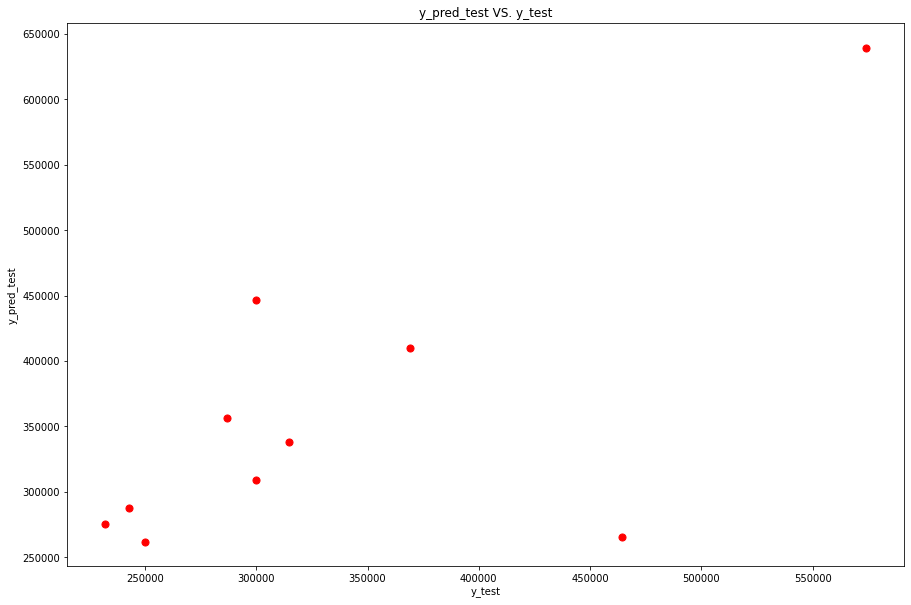

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, (y_pred_test*np.std(y_train)) + np.mean(y_train), color="red", s=50)
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.title("y_pred_test VS. y_test")
plt.show()

### Without Sklearn

In [63]:
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (37, 2)
Shape of y_train (37, 1)
Shape of x_test (10, 2)
Shape of y_test (10, 1)


In [64]:
theta = np.zeros((3,1))
x_train_new = np.c_[np.ones(len(x_train_new)), x_train_new]
x_test_new = np.c_[np.ones(len(x_test_new)), x_test_new]
iterations = 1000
alpha = 0.001

In [65]:
print("Shape of theta =",theta.shape)
print("shape of x_train_new =",x_train_new.shape)
print("Shape of x_test_new =",x_test_new.shape)

Shape of theta = (3, 1)
shape of x_train_new = (37, 3)
Shape of x_test_new = (10, 3)


In [66]:
def hypothesis(x,theta):
    return x.dot(theta)

In [67]:
def cost_function(x,y,theta):
    return np.sum((hypothesis(x,theta) - y)**2/(2*len(x)))

In [68]:
def gradient_descent(x,y,theta,iterations,alpha):
    J=[]
    for i in range(iterations):
        theta = theta - (alpha/len(x))*x.T.dot((hypothesis(x,theta) - y))
        J.append(cost_function(x,y,theta))
        if(i%100==0):
            print("Cost function =",J[-1])
    return J, theta

In [69]:
J, theta = gradient_descent(x_train_new,y_train_new,theta,iterations,alpha)
print("Cost =",J[-1])
print("theta =", theta)

Cost function = 0.4996057032934443
Cost function = 0.46446848654785494
Cost function = 0.4357412879655398
Cost function = 0.411278898768605
Cost function = 0.3897935933037188
Cost function = 0.37050149638578633
Cost function = 0.35291550156615775
Cost function = 0.33672396240047553
Cost function = 0.321719587575247
Cost function = 0.30775772354246755
Cost = 0.2948577544243743
theta = [[-0.12]
 [ 0.41]
 [ 0.1 ]]


In [70]:
y_pred = hypothesis(x_train_new,theta)
print(np.concatenate((y_train, (np.std(y_train)*y_pred)+np.mean(y_train)), axis=1))

[[599000.   410878.07]
 [229900.   327463.11]
 [239500.   325787.59]
 [579900.   415800.01]
 [259900.   361124.57]
 [285900.   354096.71]
 [469000.   387362.79]
 [255000.   357657.41]
 [699900.   478236.01]
 [549000.   465983.92]
 [199900.   327323.48]
 [314000.   389282.54]
 [539900.   409435.27]
 [475000.   372190.07]
 [259900.   328812.83]
 [239999.   360100.64]
 [329900.   373958.67]
 [349900.   355376.85]
 [169900.   316316.5 ]
 [368500.   347231.98]
 [252900.   352037.34]
 [499998.   391237.31]
 [249900.   320993.76]
 [314900.   341193.03]
 [198999.   336213.02]
 [179900.   309439.79]
 [329900.   344264.81]
 [299900.   331221.5 ]
 [399900.   367722.02]
 [449900.   376855.8 ]
 [299900.   362195.04]
 [347000.   362881.65]
 [242500.   339331.34]
 [212000.   334025.54]
 [329999.   357762.02]
 [299000.   325647.97]
 [345000.   369036.72]]


In [71]:
y_pred_t = hypothesis(x_test_new,theta)
print(np.concatenate((y_test, (np.std(y_train)*y_pred_t)+np.mean(y_train), (np.std(y_train)*y_pred_test)+np.mean(y_train)), axis=1))

[[573900.   450846.22 639651.38]
 [242900.   344450.97 287658.88]
 [287000.   370432.99 356757.47]
 [249900.   336678.44 261944.64]
 [369000.   381498.49 410224.95]
 [232000.   335689.54 275531.95]
 [299900.   392528.96 446717.61]
 [314900.   364754.85 337972.22]
 [299900.   356004.94 309024.46]
 [464500.   337655.83 265178.17]]


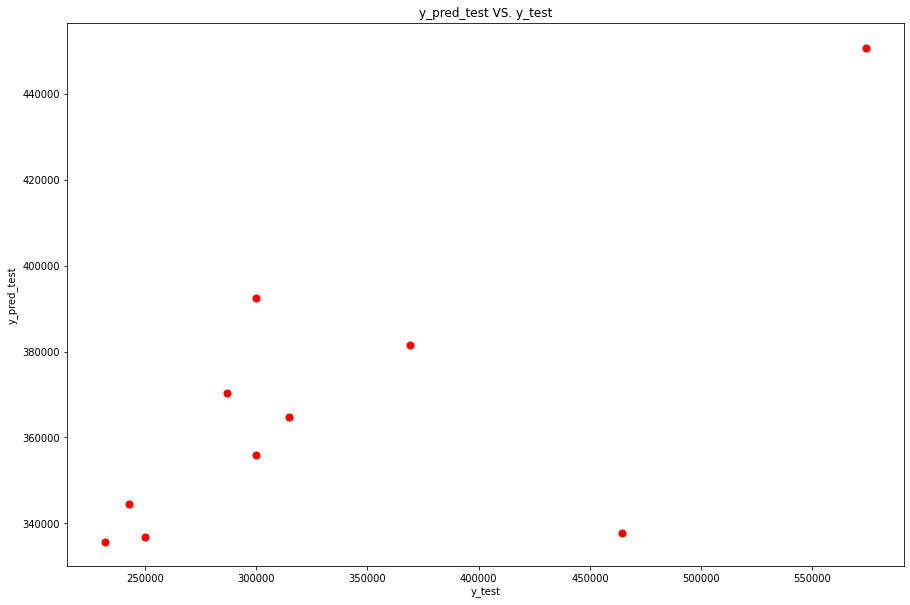

In [72]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, (y_pred_t*np.std(y_train)) + np.mean(y_train), color="red", s=50)
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.title("y_pred_test VS. y_test")
plt.show()

In [73]:
r2score = 1 - np.sum((y_test - ((np.std(y_train)*y_pred_t)+np.mean(y_train)))**2)/np.sum((y_test - np.average((np.std(y_train)*y_pred_t)+np.mean(y_train)))**2)
print(r2score)
print(J[-1])


0.3111299351659572
0.2948577544243743


In [74]:
print("R2Score =", r2_score(y_test, (y_pred_t*np.std(y_train)) + np.mean(y_train)))
print("MSE =", mean_squared_error(y_test, (y_pred_t*np.std(y_train)) + np.mean(y_train)))
print("MAE =", mean_absolute_error(y_test, (y_pred_t*np.std(y_train)) + np.mean(y_train)))

R2Score = 0.2378123763541543
MSE = 8115696759.412214
MAE = 83643.71390700377
